In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Data Preparation

## Load Dataframes

In [ ]:
# Set the proper paths to open the Boston dataset
boston_listing = pd.read_csv('Boston_listings.csv')
boston_review = pd.read_csv('Boston_reviews.csv')

In [ ]:
print(boston_listing.shape)
boston_listing.head(5)

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [ ]:
print(boston_review.shape)
boston_review.head(5)

(68275, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [ ]:
print(boston_listing['price'])

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object


## Convert data types

* Date string to `pd.Datetime`
* Currency string, e.g. `$1,000.00`, to number

In [ ]:
# pass in pattern is a regualr expression

boston_listing['price'] = boston_listing['price'].str.replace('[^-.0-9]', '', regex=True).astype(float)


In [ ]:
boston_listing['price']

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

In [ ]:
print(boston_review['date'])

0        2013-05-21
1        2013-05-29
2        2013-06-06
3        2013-06-15
4        2013-06-16
            ...    
68270    2016-06-18
68271    2016-07-03
68272    2016-07-13
68273    2016-08-26
68274    2016-08-31
Name: date, Length: 68275, dtype: object


In [ ]:
boston_review['date'] = pd.to_datetime(boston_review['date'])

In [ ]:
boston_review['date']

0       2013-05-21
1       2013-05-29
2       2013-06-06
3       2013-06-15
4       2013-06-16
           ...    
68270   2016-06-18
68271   2016-07-03
68272   2016-07-13
68273   2016-08-26
68274   2016-08-31
Name: date, Length: 68275, dtype: datetime64[ns]

## Join listings and reviews

In [ ]:
boston_df = pd.merge(boston_listing, boston_review, left_on='id', right_on='listing_id')
boston_df = boston_df.rename(columns = { 'id_y': 'review_id' })

In [ ]:
boston_df.describe()

,id_x,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month,listing_id,review_id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04,68275.000000,68275.000000,0.0,68275.000000,68275.000000,68275.000000,67510.000000,...,68202.000000,68197.000000,68199.000000,0.0,0.0,68275.000000,68275.000000,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,2.016091e+13,1.444614e+07,13.972830,13.972830,NaN,42.338246,-71.080348,3.035269,1.197571,...,9.703953,9.361145,9.234564,NaN,NaN,5.141721,3.669015,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,0.000000e+00,1.635912e+07,66.806719,66.806719,NaN,0.026307,0.032852,1.797994,0.454646,...,0.514301,0.721928,0.649583,NaN,NaN,10.991914,2.492277,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,2.016091e+13,4.240000e+03,1.000000,1.000000,NaN,42.235942,-71.171469,1.000000,0.000000,...,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,2.016091e+13,2.005394e+06,1.000000,1.000000,NaN,42.318251,-71.104974,2.000000,1.000000,...,9.000000,9.000000,9.000000,NaN,NaN,1.000000,1.710000,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,2.016091e+13,8.157833e+06,2.000000,2.000000,NaN,42.343722,-71.073886,2.000000,1.000000,...,10.000000,9.000000,9.000000,NaN,NaN,2.000000,3.220000,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,2.016091e+13,2.185136e+07,6.000000,6.000000,NaN,42.357792,-71.057207,4.000000,1.000000,...,10.000000,10.000000,10.000000,NaN,NaN,5.000000,5.330000,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,2.016091e+13,9.287818e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000,1.484378e+07,9.999045e+07,9.335034e+07


In [ ]:
boston_df.head(5)

,id_x,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,review_id,date,reviewer_id,reviewer_name,comments
0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,f,1,1.3,3075044,13631717,2014-06-01,9645972,Dmitrii,Andrea is a great host. Neighborhood is wonder...
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,f,1,1.3,3075044,13866662,2014-06-06,12020681,Paola,We had a great time at Andrea's place. He is v...
2,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,f,1,1.3,3075044,14990373,2014-06-30,8165047,Jaydee,Adrea was very welcoming and flexible to our n...
3,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,f,1,1.3,3075044,19807601,2014-09-18,21319433,Anthony,Andrea made us feel welcome because he made th...
4,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,f,1,1.3,3075044,20322887,2014-09-27,21706950,Xinny,Me and my friend were so happy about Andrea's ...


In [ ]:
# Get of all Column names in boston_review and boston_listing
boston_review_list = list(boston_review)
boston_listing_listing = list(boston_listing)

In [ ]:
boston_review_list

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

In [ ]:
boston_listing_listing

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


#1. What area is most popular during the graduation season, particularly in Boston?

Some observations:

* Popular listings: count by `listing_id` in the review dataset
* Popular areas (neighborhood): count by `neighborhood` in the listing dataset

In [ ]:
boston_review.listing_id.value_counts()

66288       404
1497879     320
414419      312
31796       291
916123      281
           ... 
9541666       1
13866156      1
10411383      1
14663743      1
5498472       1
Name: listing_id, Length: 2829, dtype: int64

In [ ]:
boston_listing.neighbourhood.value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Downtown                8
Leather District        8
Brookline               8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

## Review Count by Neighbourhood

In [ ]:
question1 = boston_df[['listing_id', 'review_id', 'neighbourhood', 'date']]
question1.head(5)

,listing_id,review_id,neighbourhood,date
0,3075044,13631717,Roslindale,2014-06-01
1,3075044,13866662,Roslindale,2014-06-06
2,3075044,14990373,Roslindale,2014-06-30
3,3075044,19807601,Roslindale,2014-09-18
4,3075044,20322887,Roslindale,2014-09-27


In [ ]:
review_count_by_neighbourhood = question1.groupby(['neighbourhood'])['review_id'].count()
review_count_by_neighbourhood

neighbourhood
Allston-Brighton      5156
Back Bay              4378
Beacon Hill           3494
Brookline                6
Cambridge               39
Charlestown           1898
Chestnut Hill            2
Chinatown              651
Dorchester            6462
Downtown                91
Downtown Crossing      954
East Boston           4636
Fenway/Kenmore        2786
Financial District      56
Government Center       52
Hyde Park              267
Jamaica Plain         8644
Leather District       106
Mattapan               148
Mission Hill          1333
North End             4099
Roslindale            1304
Roxbury               3236
Somerville              25
South Boston          4253
South End             5150
Theater District       605
West End               268
West Roxbury           672
Name: review_id, dtype: int64

### Most popular area of all time:

In [ ]:
#idxmax() function to function to find the index of the maximum value along the index axis.
popular_area = review_count_by_neighbourhood.idxmax()
popular_area

'Jamaica Plain'

In [ ]:
review_count_by_neighbourhood[popular_area]

8644

### Most popular area of Graduate season

In [ ]:
pd.to_datetime(question1['date']).dt.month

0         6
1         6
2         6
3         9
4         9
         ..
68270    12
68271    12
68272     8
68273     8
68274     9
Name: date, Length: 68275, dtype: int64

In [ ]:
question1['month'] = pd.to_datetime(question1['date']).dt.month

/var/folders/q3/brvrh9jj2f5345crdx3z4_140000gn/T/ipykernel_2254/3751370996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question1['month'] = pd.to_datetime(question1['date']).dt.month


In [ ]:
review_count_by_neighbourhood_graduate_season = question1[question1['month']==5].groupby(['neighbourhood'])['review_id'].count()
review_count_by_neighbourhood_graduate_season

neighbourhood
Allston-Brighton       658
Back Bay               529
Beacon Hill            373
Cambridge                1
Charlestown            214
Chinatown               71
Dorchester             695
Downtown                20
Downtown Crossing      117
East Boston            531
Fenway/Kenmore         330
Financial District       2
Government Center        9
Hyde Park               35
Jamaica Plain         1040
Leather District        13
Mattapan                22
Mission Hill           137
North End              474
Roslindale             169
Roxbury                399
Somerville               3
South Boston           499
South End              663
Theater District       109
West End                36
West Roxbury            74
Name: review_id, dtype: int64

In [ ]:
question1_bonus = boston_df[['date', 'review_id','neighbourhood']].copy()

In [ ]:
question1_bonus

,date,review_id,neighbourhood
0,2014-06-01,13631717,Roslindale
1,2014-06-06,13866662,Roslindale
2,2014-06-30,14990373,Roslindale
3,2014-09-18,19807601,Roslindale
4,2014-09-27,20322887,Roslindale
...,...,...,...
68270,2015-12-15,56653411,Somerville
68271,2015-12-20,56988524,Somerville
68272,2016-08-27,97439523,Somerville
68273,2016-08-27,97541584,Somerville


In [ ]:
question1_bonus['month']=question1['date'].dt.strftime('%m')

In [ ]:
question1_bonus

,date,review_id,neighbourhood,month
0,2014-06-01,13631717,Roslindale,06
1,2014-06-06,13866662,Roslindale,06
2,2014-06-30,14990373,Roslindale,06
3,2014-09-18,19807601,Roslindale,09
4,2014-09-27,20322887,Roslindale,09
...,...,...,...,...
68270,2015-12-15,56653411,Somerville,12
68271,2015-12-20,56988524,Somerville,12
68272,2016-08-27,97439523,Somerville,08
68273,2016-08-27,97541584,Somerville,08


In [ ]:
question1_bonus_bymonth= question1_bonus.groupby(['neighbourhood','month']).review_id.count().reset_index()
question1_bonus_bymonth

,neighbourhood,month,review_id
0,Allston-Brighton,01,151
1,Allston-Brighton,02,160
2,Allston-Brighton,03,324
3,Allston-Brighton,04,466
4,Allston-Brighton,05,658
...,...,...,...
310,West Roxbury,08,129
311,West Roxbury,09,61
312,West Roxbury,10,45
313,West Roxbury,11,24


#2. What time of year is most popular?

In [ ]:
question1 = boston_df[['date', 'review_id']].copy()

In [ ]:
# Consider month only
question1['month'] = question1['date'].dt.strftime('%m')
question1

,date,review_id,month
0,2014-06-01,13631717,06
1,2014-06-06,13866662,06
2,2014-06-30,14990373,06
3,2014-09-18,19807601,09
4,2014-09-27,20322887,09
...,...,...,...
68270,2015-12-15,56653411,12
68271,2015-12-20,56988524,12
68272,2016-08-27,97439523,08
68273,2016-08-27,97541584,08


In [ ]:
review_count_by_month = question1.groupby(['month'])['review_id'].count()
review_count_by_month

month
01     2119
02     1964
03     3853
04     6116
05     8115
06     8369
07     9333
08    10345
09     5985
10     6095
11     3729
12     2252
Name: review_id, dtype: int64

#3. Do prices vary over the course of the year? What are prices like each month? 

In [ ]:
boston_price_over_year = boston_df.groupby(boston_df['date'].dt.month)['price'].mean()

In [ ]:
boston_price_over_year

date
1     148.931100
2     148.125255
3     146.942123
4     147.554447
5     148.051510
6     145.686462
7     148.926605
8     144.000000
9     145.450627
10    151.403117
11    148.405739
12    146.158526
Name: price, dtype: float64

In [ ]:
x = question1['month'].unique()
x.sort()
x

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

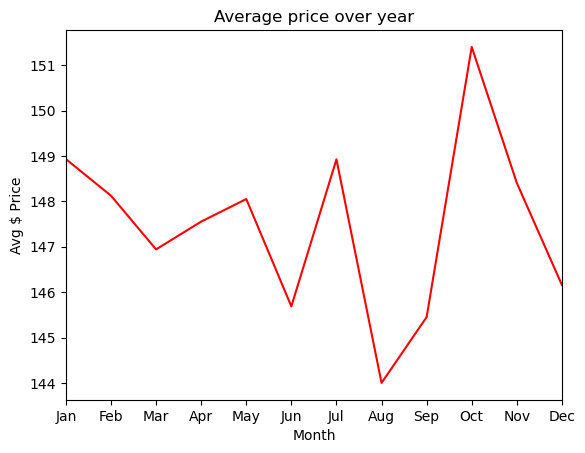

In [ ]:
## Graph the price over a year ('add Jan, Feb, ... instead of the numbers...')
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = boston_df.groupby(boston_df['date'].dt.month)['price'].mean()
plt.plot(x,y,'r')
plt.xlabel('Month')
plt.ylabel('Avg $ Price')
plt.title ('Average price over year')
plt.xlim([x[0],x[-1]])
plt.show()

#4. Does the price fluctuate based on parking availability or other amenities?

## Preparing data for the pricing model

Extract/process columns that may fluctuate the pricing model.

In [ ]:
boston_pricing = boston_listing[['id', 'price', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities']].copy()

In [ ]:
boston_pricing.head()

,id,price,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities
0,12147973,250.0,House,Entire home/apt,4,1.5,2.0,3.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."
1,3075044,65.0,Apartment,Private room,2,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio..."
2,6976,65.0,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit..."
3,1436513,75.0,House,Private room,4,1.0,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio..."
4,7651065,79.0,House,Private room,2,1.5,1.0,2.0,"{Internet,""Wireless Internet"",""Air Conditionin..."


In [ ]:
boston_pricing['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [ ]:
boston_pricing['accommodates'].describe()

count    3585.000000
mean        3.041283
std         1.778929
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        16.000000
Name: accommodates, dtype: float64

In [ ]:
boston_pricing['amenities'].describe()

count     3585
unique    3092
top         {}
freq        32
Name: amenities, dtype: object

In [ ]:
boston_pricing['amenities'][0]

'{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}'

In [ ]:
# Count number of amenities
boston_pricing['num_amenities'] = boston_pricing['amenities'].str.count(',') + 1

In [ ]:
# May consider some specific amentities, e.g. Kitchen, allowed pets?
boston_pricing['kitchen'] = boston_pricing['amenities'].str.contains('kitchen', case=False)
boston_pricing['pets_allowed'] = boston_pricing['amenities'].str.contains('Pets Allowed', case=False)
boston_pricing['free_parking'] = boston_pricing['amenities'].str.contains('Free Parking', case=False)

In [ ]:
boston_pricing.describe()

,id,price,accommodates,bathrooms,bedrooms,beds,num_amenities
count,3.585000e+03,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,3585.000000
mean,8.440875e+06,173.925802,3.041283,1.221647,1.255944,1.609060,15.862762
std,4.500787e+06,148.331321,1.778929,0.501487,0.753060,1.011745,4.832590
min,3.353000e+03,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,4.679319e+06,85.000000,2.000000,1.000000,1.000000,1.000000,13.000000
50%,8.577620e+06,150.000000,2.000000,1.000000,1.000000,1.000000,16.000000
75%,1.278953e+07,220.000000,4.000000,1.000000,2.000000,2.000000,19.000000
max,1.493346e+07,4000.000000,16.000000,6.000000,5.000000,16.000000,31.000000


## Take care of missing data

In [ ]:
# Check if some columns has NaN values
boston_pricing.isna().sum()

id                0
price             0
property_type     3
room_type         0
accommodates      0
bathrooms        14
bedrooms         10
beds              9
amenities         0
num_amenities     0
kitchen           0
pets_allowed      0
free_parking      0
dtype: int64

In [ ]:
# Fill in NA with the mean value
boston_pricing["bathrooms"] = boston_pricing["bathrooms"].fillna(boston_pricing["bathrooms"].mean())
boston_pricing["bedrooms"] = boston_pricing["bedrooms"].fillna(boston_pricing["bedrooms"].mean())
boston_pricing["beds"] = boston_pricing["beds"].fillna(boston_pricing["beds"].mean())

In [ ]:
boston_pricing['property_type'].describe()

count          3582
unique           13
top       Apartment
freq           2612
Name: property_type, dtype: object

In [ ]:
# For 'property_type' (which is not number, so we don't have mean), we fill NA with the most popular value which is "Apartment"
boston_pricing['property_type'] = boston_pricing['property_type'].fillna('Apartment')


In [ ]:
# Check NA again in the entire dataset
boston_pricing.isna().sum()

id               0
price            0
property_type    0
room_type        0
accommodates     0
bathrooms        0
bedrooms         0
beds             0
amenities        0
num_amenities    0
kitchen          0
pets_allowed     0
free_parking     0
dtype: int64

## Split Training/Testing

In [ ]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(
    boston_pricing[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'num_amenities', 'kitchen', 'pets_allowed', 'free_parking']],
    boston_pricing['price'],
    test_size=0.2, random_state=42)

## Linear Regression

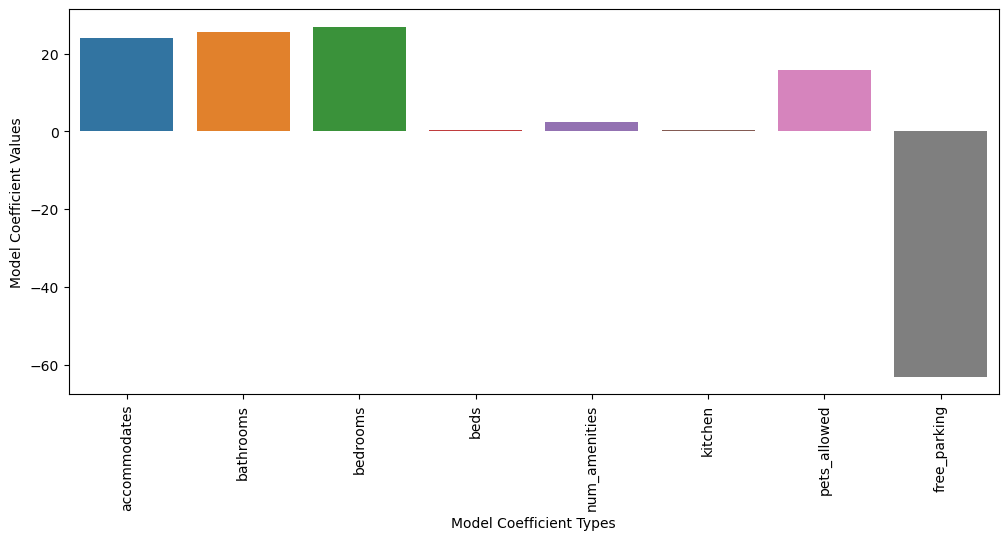

R2 Score:  0.28025901242948337
Average Coefficients:  19.858770211025202
Root Mean Squared Error:  116.27634049501663


/Users/bdamadi/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


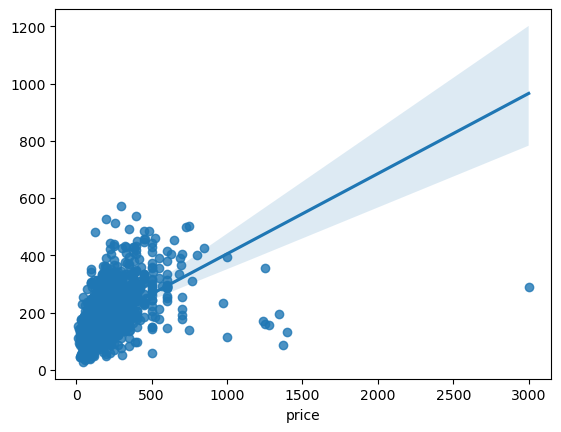

In [ ]:
# https://medium.com/hanman/data-modeling-building-a-house-price-prediction-model-1450f825073b
from sklearn.linear_model import LinearRegression
from math import sqrt

lr = LinearRegression()
lr_model = lr.fit(X, y)
y_pred = lr_model.predict(X)

lr_r2 = r2_score(y, y_pred)
bx=plt.subplots(figsize=(12,5))
bx= sns.barplot(x=0, y=1, data=pd.DataFrame(zip(X.columns, lr_model.coef_)))
plt.xticks(rotation='vertical')
plt.xlabel("Model Coefficient Types")
plt.ylabel("Model Coefficient Values")
plt.show()
print("R2 Score: ", (lr_r2))
print("Average Coefficients: ", (abs(lr_model.coef_).mean()))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(y, y_pred)))
ax = sns.regplot(y, y_pred)

In [ ]:
##is a way that we can use our training data in order to get good estimates 
## how well our model will perform on data we haven't seen before 
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr_model, X, y, n_jobs=1, cv=5))

0.28440937036174246

## Random Forest Regression

In [ ]:
#Training the Regression model on the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X, y)
y_pred = regressor.predict(X)

In [ ]:
from sklearn.metrics import r2_score, accuracy_score

print('R2 Score:', r2_score(y, y_pred))
print('Accuracy (%):', regressor.score(X, y) * 100)

R2 Score: 0.7094437409413359
Accuracy (%): 70.9443740941336


In [ ]:
y_test_pred = regressor.predict(X_test)
print('R2 Score:', r2_score(y_test,y_test_pred))

R2 Score: 0.1286139678853473
